https://journals.aps.org/prl/abstract/10.1103/PhysRevLett.122.146601


In [1]:
import sys
sys.path.insert(0, '../')
from square_tight_binding import *

lx= 5 , ly= 5


In [2]:
p=1
q=L_y #q değeri, ly'nin tam böleni olmak zorunda
#Magnetic Flux Per Plaquet has to be rational value
alpha=p/q

#Real Space Hamiltonian with Twisted Angle Phases
def HMat_Theta(alpha, theta_x, theta_y):
    H = np.zeros((L_x*L_y, L_x*L_y), dtype=complex)
    for m in range(L_x*L_y):
        for n in range(L_x*L_y):
            #NN
            if m in PerBCLat[n]:
                #X ekseninde sınırdan sınıra atlamalar:
                if np.absolute(xy[m][0]-xy[n][0])==L_x-1:
                    if xy[m][0] > xy[n][0]:
                        H[m][n] = -np.exp(-1j*2*np.pi*(alpha)*xy[m][1])*np.exp(-1j*theta_x)
                    elif xy[m][0] < xy[n][0]:
                        H[m][n] = -np.exp(1j*2*np.pi*(alpha)*xy[m][1])*np.exp(1j*theta_x)

                #Y ekseninde sınırdan sınıra atlamalar
                elif np.absolute(xy[m][1]-xy[n][1])==L_y-1:
                    if xy[m][1] > xy[n][1]:
                        H[m][n] = -np.exp(1j*theta_y)
                    elif xy[m][1] < xy[n][1]:
                        H[m][n] = -np.exp(-1j*theta_y)
                        
                #Lattice içi atlamalar
                else:
                    if xy[m][0] > xy[n][0]:
                        H[m][n] = -np.exp(1j*2*np.pi*alpha*xy[m][1])
                    elif xy[m][0] < xy[n][0]:
                        H[m][n] = -np.exp(-1j*2*np.pi*alpha*xy[m][1])
                    else:
                        H[m][n] = -np.exp(0)
    return H

In [3]:
from Periodic_BC_Hofstadter_Hamiltonian_Matrix import *
PerHMat(alpha) == HMat_Theta(alpha, 0, 0) # check!

array([[ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True],


In [4]:
E0, U0 = np.linalg.eig(HMat_Theta(alpha, 9, 9))
E0 = np.sort(E0)
idx1 = np.argsort(E0)
U0_sorted = U0[:,idx1]
np.real(E0)

array([-2.90522026, -2.90522026, -2.90522026, -2.90522026, -2.90522026,
       -1.33468195, -1.33468195, -1.33468195, -1.33468195, -1.33468195,
        0.33808561,  0.33808561,  0.33808561,  0.33808561,  0.33808561,
        0.93800872,  0.93800872,  0.93800872,  0.93800872,  0.93800872,
        2.96380788,  2.96380788,  2.96380788,  2.96380788,  2.96380788])

In [5]:
# Discreatizing Brillioun Zone / Theta Space
Nt1=10
Nt2=10
dx = 2*np.pi/Nt1
dy = dx
theta_x = np.arange(0, 2*np.pi, dx)
theta_y = np.arange(0, 2*np.pi, dy)

There is alway degeneracy for each theta values!

In [6]:
b1 = 0
b2 = 3
EEA=np.empty([Nt1,Nt2,L_x*L_y])
UUA=np.empty([Nt1,Nt2,L_x*L_y,L_x*L_y],dtype=complex)
for it1 in range(Nt1):
    for it2 in range(Nt2):
        EEA[it1,it2,:],UUA[it1,it2,:,:] = np.linalg.eigh(HMat_Theta(alpha, theta_x[it1], theta_y[it2]))
        # sort
        idx = np.argsort(EEA[it1,it2,:])
        UUA[it1,it2,:,:] = UUA[it1,it2,:,idx]     

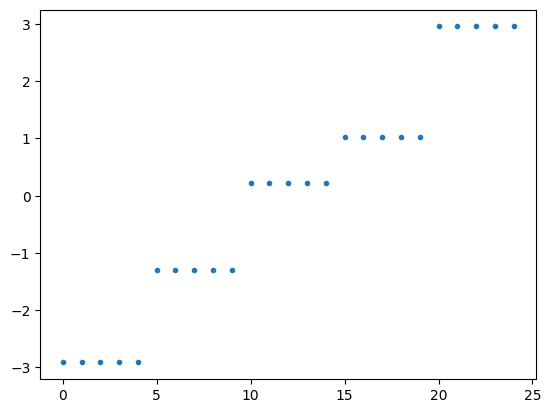

In [7]:
import matplotlib.pyplot as plt
plt.plot(EEA[3,5,:], '.' )

In [10]:
#Calculate Chern Numbes
chern_array = []
for i in np.arange(0, L_x*L_y, q):
    j=i+q
    S=0
    n1=i
    n2=j
    print(n1,n2)
    for t_x in range(0, len(theta_x)):
        for t_y in range(0, len(theta_y)):
            w1, v1 = np.linalg.eig(HMat_Theta(alpha, theta_x[t_x], theta_y[t_y]))
#             w1 = np.sort(w1)
            idx1 = np.argsort(w1)
            v1_sorted = v1[:,idx1]
            v11 = v1_sorted[:,n1:n2] #multiplet 
            w2, v2 = np.linalg.eig(HMat_Theta(alpha, theta_x[t_x]+dx, theta_y[t_y]))
#             w2 = np.sort(w2)
            idx2 = np.argsort(w2)
            v2_sorted = v2[:,idx2]
            v22 = v2_sorted[:,n1:n2]
            w3, v3 = np.linalg.eig(HMat_Theta(alpha, theta_x[t_x], theta_y[t_y]+dy))
#             w3 = np.sort(w3)
            idx3 = np.argsort(w3)
            v3_sorted = v3[:,idx3]
            v33 = v3_sorted[:,n1:n2]
            w4, v4 = np.linalg.eig(HMat_Theta(alpha, theta_x[t_x]+dx, theta_y[t_y]+dy))
#             w4 = np.sort(w4)
            idx4 = np.argsort(w4)
            v4_sorted = v4[:,idx4]
            v44 = v4_sorted[:,n1:n2]
            # CHECK: 
            # v11,v22,v33,v44 D-Fold Degenerate Multiplet Matrices (w1,w2,w3,w4 are degenerate)
            U1 = np.linalg.det(np.matmul(np.conjugate(np.transpose(v11)), v22)) #U_x
            U1 = U1 / np.absolute(U1)
            U2 = np.linalg.det(np.matmul(np.conjugate(np.transpose(v22)), v44)) #U_y dx
            U2 = U2 / np.absolute(U2)
            U3 = np.linalg.det(np.matmul(np.conjugate(np.transpose(v33)), v44)) #U_x dy
            U3 = U3 / np.absolute(U3)
            U4 = np.linalg.det(np.matmul(np.conjugate(np.transpose(v11)), v33)) #U_y
            U4 = U4 / np.absolute(U4)
            F = np.log(U1*U2*1/U3*1/U4)
            S = S+F

    C = 1/(2*np.pi*1j)*S
    C.real
    chern_array.append(C.real)
print('Chern Numbers (q='+str(q)+') of Seperation of Bands: '+str(chern_array))

0 3
3 6
6 9
Chern Numbers (q=3) of Seperation of Bands: [0.9999999999999994, -1.999999999999999, 0.9999999999999999]


In [66]:
#Calculate Chern Numbes
S=0
n1 = 6
n2 = 8
for t_x in range(0, len(theta_x)):
    for t_y in range(0, len(theta_y)):
        w1, v1 = np.linalg.eig(HMat_Theta(alpha, theta_x[t_x], theta_y[t_y]))
        idx1 = np.argsort(w1)
        v1_sorted = v1[:,idx1]
        v11 = v1_sorted[:,n1:n2] 
        w2, v2 = np.linalg.eig(HMat_Theta(alpha, theta_x[t_x]+dx, theta_y[t_y]))
        idx2 = np.argsort(w2)
        v2_sorted = v2[:,idx2]
        v22 = v2_sorted[:,n1:n2]
        w3, v3 = np.linalg.eig(HMat_Theta(alpha, theta_x[t_x], theta_y[t_y]+dy))
        idx3 = np.argsort(w3)
        v3_sorted = v3[:,idx3]
        v33 = v3_sorted[:,n1:n2]
        w4, v4 = np.linalg.eig(HMat_Theta(alpha, theta_x[t_x]+dx, theta_y[t_y]+dy))
        idx4 = np.argsort(w4)
        v4_sorted = v4[:,idx4]
        v44 = v4_sorted[:,n1:n2]
        U1 = np.linalg.det(np.matmul(np.conjugate(np.transpose(v11)), v22)) #U_x
        U1 = U1 / np.absolute(U1)
        U2 = np.linalg.det(np.matmul(np.conjugate(np.transpose(v22)), v44)) #U_y dx
        U2 = U2 / np.absolute(U2)
        U3 = np.linalg.det(np.matmul(np.conjugate(np.transpose(v33)), v44)) #U_x dy
        U3 = U3 / np.absolute(U3)
        U4 = np.linalg.det(np.matmul(np.conjugate(np.transpose(v11)), v33)) #U_y
        U4 = U4 / np.absolute(U4)
        F = np.log(U1*U2*1/U3*1/U4)
        S = S+F

C = 1/(2*np.pi*1j)*S
C

(3.895555990297016-2.557769931938896e-16j)

In [8]:
def calc_link_var(ψk1, ψk2):
    s = np.linalg.det(np.matmul(np.conjugate(np.transpose(ψk1)), ψk2))
    return s/np.absolute(s)

def calc_link_vars_BZ(UUA):
    N1, N2 = UUA.shape[0:2]
    UU=np.zeros([N1,N2,2],dtype=complex)
    dirs = [[1,0], [0,1]]
    for i1 in range(N1):
        for i2 in range(N2):
            for idir, vdir in enumerate(dirs):
                    UU[i1,i2,idir] = calc_link_var(UUA[i1                   ,i2               ,:,:],
                                                   UUA[np.mod(i1+vdir[0],N1),np.mod(i2+vdir[1],N2),:,:])
    return UU        

def calc_F12_BZ(UU):
    return np.log( UU[:,:,0]*
                   np.roll(UU[:,:,1],-1,axis=0)*
                   np.conj(np.roll(UU[:,:,0],-1,axis=1)*
                   UU[:,:,1]) )

In [10]:
for i in np.arange(0, L_x*L_y, q):
    j=i+2
    UU = calc_link_vars_BZ(UUA[:,:,:,i:j])
    F12 = calc_F12_BZ(UU)
    print(f'{F12.sum()/(2j*np.pi):.2e}')

1.00e+00+3.34e-16j
-4.95e-16-1.20e-16j
4.00e+00+3.20e-16j
-4.00e+00-1.84e-16j
4.00e+00-6.11e-16j


# SORU:

Neden E'leri küçükten büyüğe sıraladığımda Chern'ler değişti?

"Hofstadter SP Chern Numbers in Julia" dosyası ile E'ler ve E'lerin sırası aynı olduğu halde neden U'ların sırası aynı değil?

MB Hofstadter Chern Hesabı tutarsızlığı buradan kaynaklanıyor olabilir.

# Problem Dışı:

Dejenere enerjilere karşılık gelen tam öz-değerleri almıyoruz. Örneğin, lx=ly=5 iken 5'er kat dejenere gelen enerjileri 6'şar 6'şar multipler şeklinde aldığımız da Chern'ler doğru üretiliyor.